In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Data Pre-process

In [35]:
kickstarter = pd.read_csv('../datasets/kickstarter-2018-reduced.csv').fillna(0)
kickstarter['main_category'], main = pd.factorize(kickstarter['main_category'])
kickstarter['country'], country = pd.factorize(kickstarter['country'])
kickstarter['state'], state = pd.factorize(kickstarter['state'])
kickstarter['category'], cat = pd.factorize(kickstarter['category'])
kickstarter.head()

,category,main_category,currency,goal,launched_utc,state,backers,country,usd pledged,time_open
0,0,0,GBP,1000.0,1439295148,0,0,0,0.0,1415
1,1,1,USD,30000.0,1504327437,0,15,1,100.0,1438
2,1,1,USD,45000.0,1357950050,0,3,1,220.0,1080
3,2,2,USD,5000.0,1331954651,0,1,1,1.0,721
4,3,1,USD,19500.0,1435998903,1,14,1,1283.0,1336


In [36]:
kickstarter.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,29999.0,3.886816e+01,3.454452e+01,0.0,9.000000e+00,3.000000e+01,5.600000e+01,1.580000e+02
main_category,29999.0,4.961465e+00,4.103028e+00,0.0,1.000000e+00,4.000000e+00,8.000000e+00,1.400000e+01
goal,29999.0,3.967989e+04,7.434643e+05,1.0,2.000000e+03,5.000000e+03,1.600000e+04,1.000000e+08
launched_utc,29999.0,1.411615e+09,6.106611e+07,3600.0,1.367597e+09,1.417417e+09,1.458149e+09,1.514881e+09
state,29999.0,9.026301e-01,1.027857e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00
backers,29999.0,1.042569e+02,8.993266e+02,0.0,2.000000e+00,1.200000e+01,5.600000e+01,8.558100e+04
country,29999.0,1.727258e+00,2.814654e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,2.200000e+01
usd pledged,29999.0,6.834517e+03,7.508648e+04,0.0,1.600000e+01,3.900000e+02,3.044610e+03,8.596475e+06
time_open,29999.0,8.312338e+02,2.078190e+03,24.0,7.200000e+02,7.200000e+02,8.895000e+02,3.568090e+05


In [37]:
X = kickstarter.drop('main_category', axis=1)
y = kickstarter['main_category']

In [38]:
X = X[((y == 1) | (y == 6)) & (kickstarter['time_open'] < 750) & (kickstarter['state'] == 2)]
y = y[((y == 1) | (y == 6)) & (kickstarter['time_open'] < 750) & (kickstarter['state'] == 2)]
X = X[['backers', 'usd pledged']]
X.describe()

,backers,usd pledged
count,2128.000000,2.128000e+03
mean,375.646147,2.353377e+04
std,2484.046215,2.215540e+05
min,1.000000,0.000000e+00
25%,34.000000,1.350495e+03
50%,79.000000,4.318500e+03
75%,222.000000,1.220877e+04
max,85581.000000,8.596475e+06


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704
0.651408450704


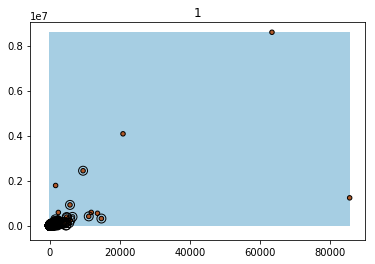

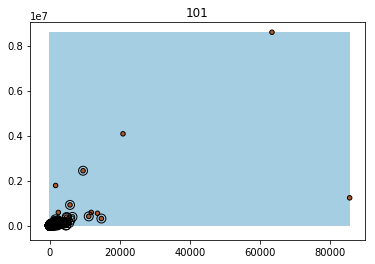

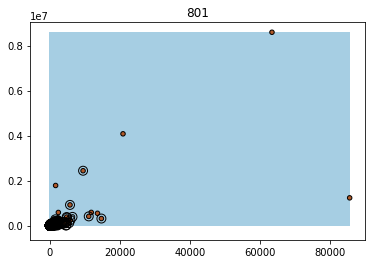

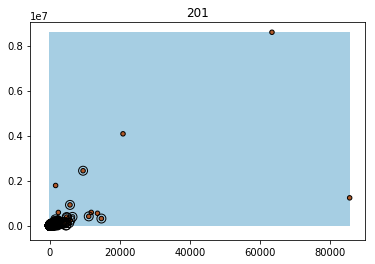

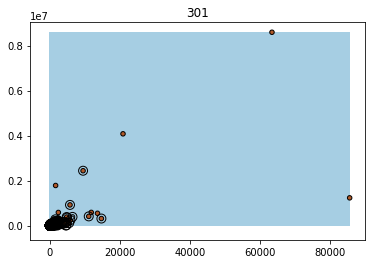

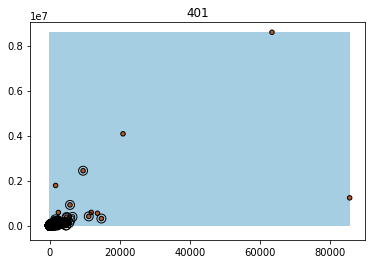

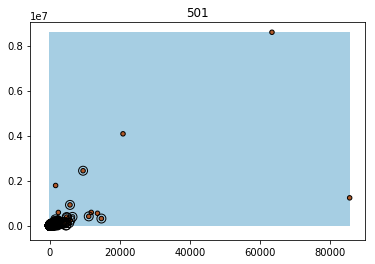

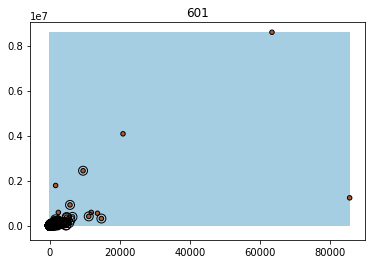

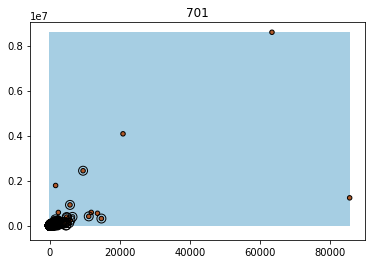

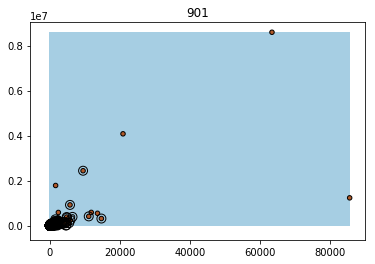

In [40]:
# fit the model using ovo shape
for i in xrange(1, 1000, 100):
    clf = svm.SVC(kernel='rbf',decision_function_shape='ovo', gamma=i)
    clf.fit(X_train, y_train)

    accur = clf.score(X_test, y_test)
    
    plt.figure(i)
    plt.clf()
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test.values[:, 0], X_test.values[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X.values[:, 0].min()
    x_max = X.values[:, 0].max()
    y_min = X.values[:, 1].min()
    y_max = X.values[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    print accur
    plt.title(i)
    
plt.show()